In [63]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [70]:
df = pd.read_csv("data/bank-additional-full.csv", delimiter = ";")

In [71]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [72]:
from sklearn.preprocessing import LabelEncoder, normalize
#enum_features = ['job', 'marital', 'education', 'default', 
#                 'housing', 'loan', 'contact', 'month', 'day_of_week', 
#                'poutcome', 'y']
#df[enum_features] = df[enum_features].apply(LabelEncoder().fit_transform)
#df.head()

In [83]:
df = df.copy()
dummies = pd.get_dummies(df)
dummies = dummies.drop(["duration","y_no"],axis=1)
dummies

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_yes
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
5,45,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
6,59,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,1,0,0,0,0,1,0,0
7,41,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
8,24,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0
9,25,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,1,0,0,0,0,1,0,0


In [78]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100)

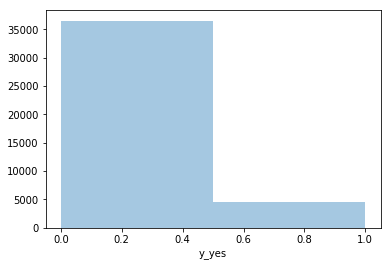

In [79]:
yes_col=dummies["y_yes"]
plot=sns.distplot(a=yes_col,kde=False,bins=2,hist=True)
plt.show()

In [85]:
from sklearn.model_selection import cross_val_score
X = normalize(dummies.drop(["y_yes"], axis=1), norm='l2')
y = dummies["y_yes"]
#10-fold cross-val of model
score=cross_val_score(clf,X,y,cv=10)
print("Acurracy: %0.3f +/-%0.3f"%(score.mean(),score.std()*2))

Acurracy: 0.546 +/-0.509


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
#splitting data to train and test set
x_train, x_test, y_train, y_test=train_test_split(X, y,test_size=0.4,random_state=0)
#training on test set
clf.fit(x_train,y_train)
#prediciting on test set
prediction=clf.predict(x_test)
#printing a confusin matrix of predicitons

print(accuracy_score(y_test,prediction))
print(confusion_matrix(y_test,prediction))

0.8883224083515416
[[14087   568]
 [ 1272   549]]
